# Data Cleaning and EDA (Exploratory Data Analysis)


## Data set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Attribute Information:

#### Independent Variables (Features):

#### Bank client data
1. Age (numeric)
2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign
8. Contact: contact communication type (categorical:
'cellular','telephone')
9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
10. Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
11. Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

#### Other attributes
12. Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
13. Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
14. Previous: number of contacts performed before this campaign and for
this client (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

#### Social and economic context attributes
16. Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
17. Cons.price.idx: consumer price index - monthly indicator (numeric)
18. Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
19. Euribor3m: euribor 3 month rate - daily indicator (numeric)
20. Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Summary: 
-> There are 20 Independent Variables (Features) and 1 Dependent Variable (Target)

#### Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [11]:
bank = pd.read_csv("bank-additional-full.csv", sep = ';')

Setelah membaca variable description dataset ini, saya membuat keputusan utk membuang atau men-drop variable duration,
dikarenakan feature ini sangat mempengaruhi target variable kita di model ini (e.g., if duration=0 then y='no').
Dan duration ini didapat setelah kita menelpon target client, jika belom ada penelponan, feature ini tidak ada gunanya. 
Maka utk membuat model yg se-realistic mungkin, sesuai dengan pernyataan di description, sebaiknya di drop saja.

In [13]:
bank.drop("duration", axis = 1, inplace = True)

In [14]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
bank.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [18]:
bank.shape

# dataset ini mempunyai sekarang mempunyai 20 columns dan 41188 rows
# data rows disini merepresentasikan user / customer data

(41188, 20)

In [19]:
bank.info()

# disini bisa dilihat bahwa tidak ada missing values 
# tetapi adanya data yg valuenya "unknown" dan "nonexistent", bisa kita anggap sebagai data missing value kita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [22]:
bank.isnull().any()

# tidak ada missing value

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [23]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
bankDesc = []
for item in bank.columns:
    bankDesc.append([item, bank[item].dtypes, bank[item].isna().sum(), round((bank[item].isna().sum() / len(bank)) * 100, 2), bank[item].nunique()
                  , bank[item].drop_duplicates().sample(2).values])
    
pd.DataFrame(bankDesc, columns = ["Data Features", "Data Type", "null", "nullPct", "unique", "uniqueSample"])

,Data Features,Data Type,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[44, 56]"
1,job,object,0,0.0,12,"[entrepreneur, management]"
2,marital,object,0,0.0,4,"[divorced, married]"
3,education,object,0,0.0,8,"[basic.4y, professional.course]"
4,default,object,0,0.0,3,"[unknown, no]"
5,housing,object,0,0.0,3,"[no, unknown]"
6,loan,object,0,0.0,3,"[unknown, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, apr]"
9,day_of_week,object,0,0.0,5,"[wed, thu]"


In [21]:
bank.describe()

# bisa dilihat bahwa terdapat outlier di columns "campaign" dan "previous"
# dimana jarak antara Q3 (75%) dan max cukup jauh perbedaannya

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA

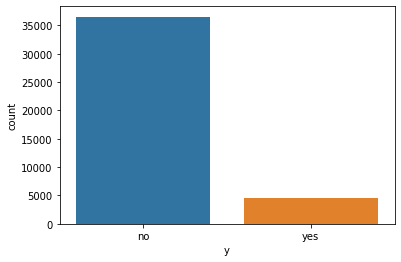

In [28]:
sns.countplot("y", data = bank)

# kita bisa melihat bahwa datanya lumayan imbalance karena lebih banyak jauh yg "no" daripada "yes"

In [39]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

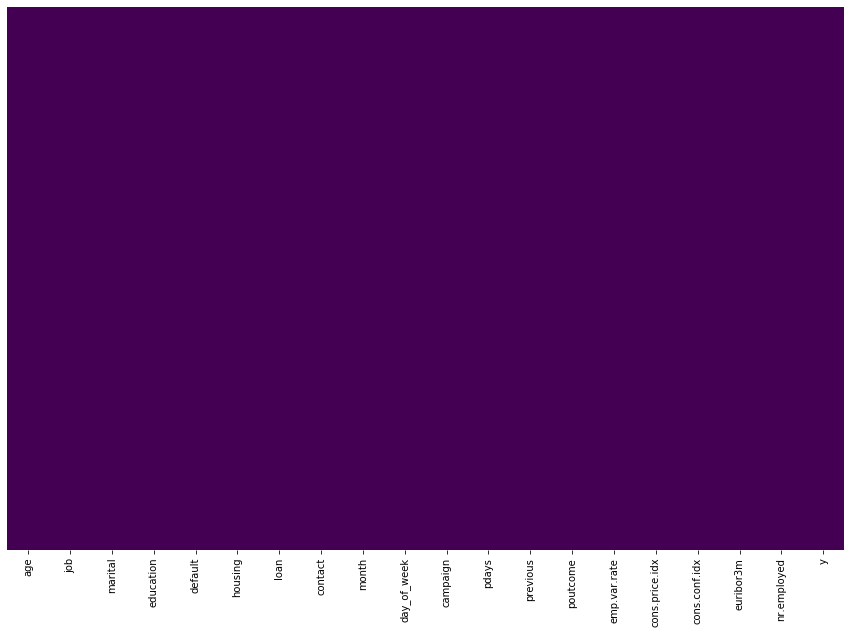

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
sns.heatmap(bank.isna(),yticklabels=False,cbar=False,cmap='viridis')

# ini hanya visualisasi missing values saja

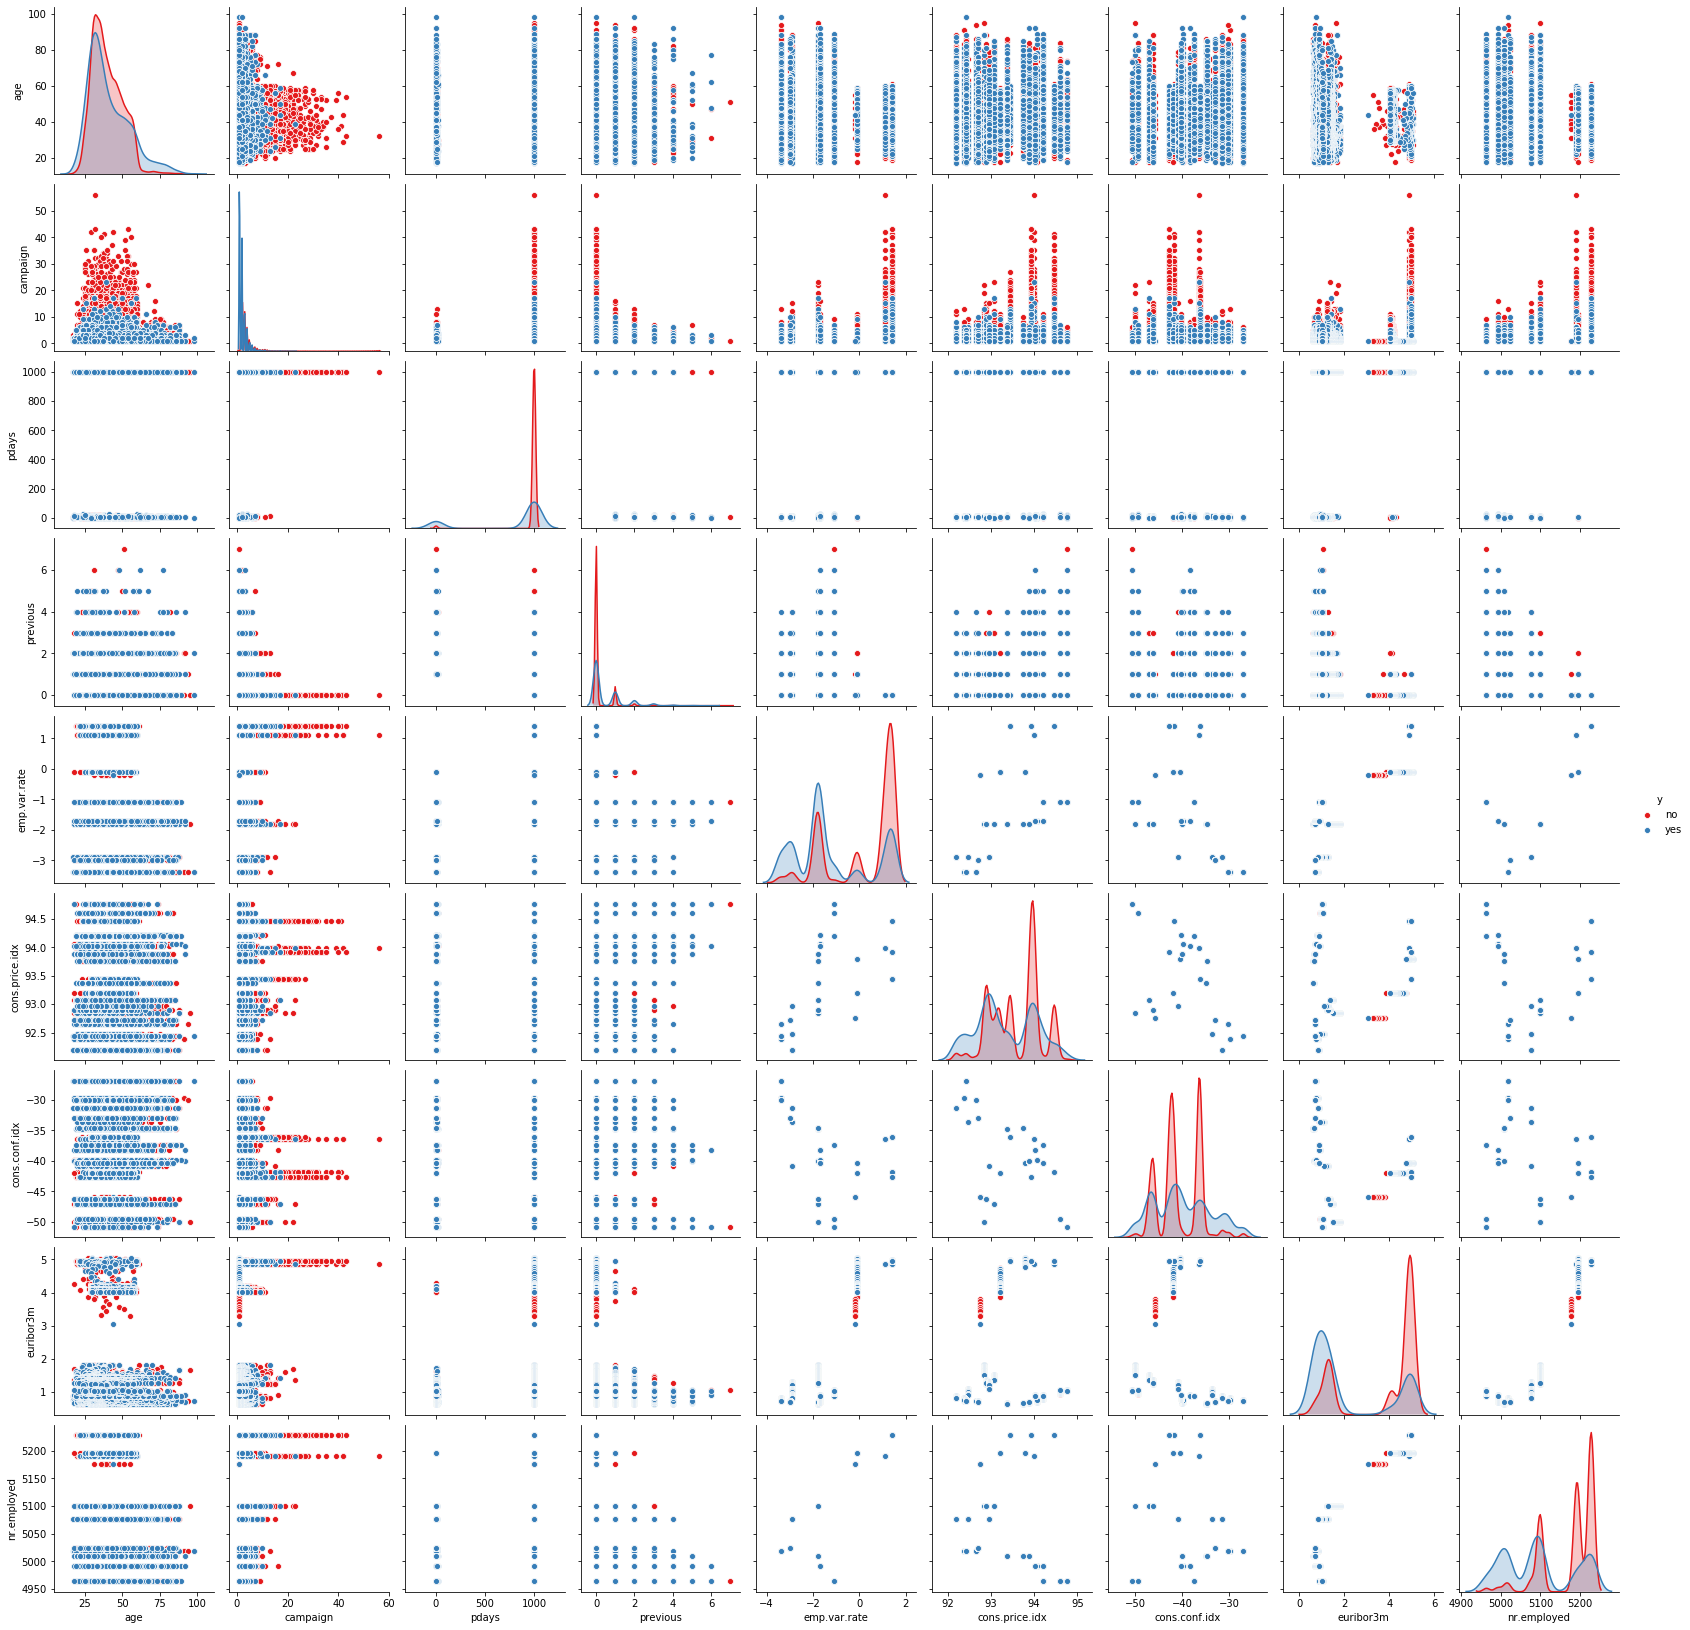

In [37]:
sns.pairplot(bank, hue = "y", palette = "Set1")

# rata" client bank, tidak subscribed utk bank term deposit

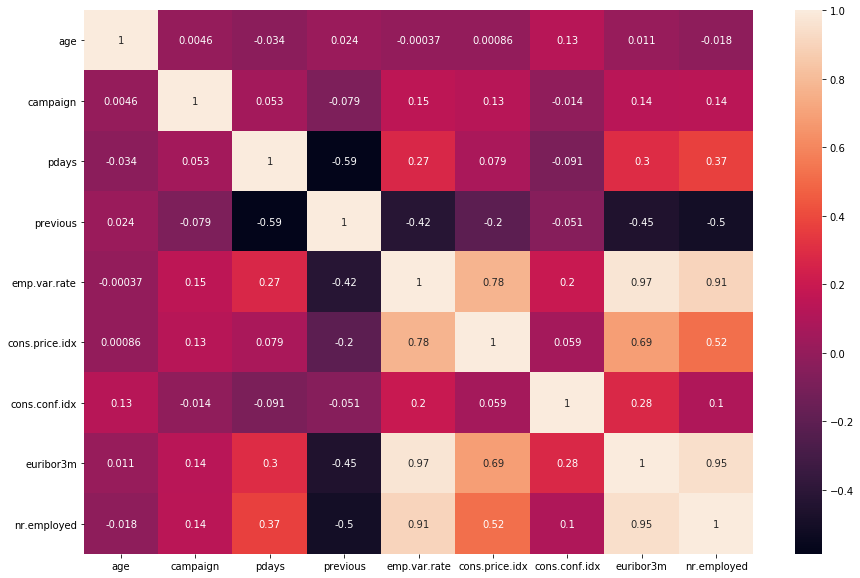

In [41]:
figure(figsize = (15,10))
sns.heatmap(bank.corr(), annot = True)

# ada beberapa features dari social and economic context attributes yang memiliki correlation yang tinggi 

yang punya multicorrelation kebanyakan yang berhubungan dengan feature euribor3m, nr.employed, emp.var.rate,
cons.price.idx
dari 4 features tersebut, saya akan membuang 2 diantaranya, tapi sebelom itu saya mau mengeksplorasi data lebih
dalam dulu.

In [96]:
numData = bank.select_dtypes(exclude = object).columns
numData

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [97]:
desc_age = bank["age"].describe()
desc_campaign = bank["campaign"].describe()
desc_pdays = bank["pdays"].describe()
desc_previous = bank["previous"].describe()
desc_emp = bank["emp.var.rate"].describe()
desc_consprice = bank["cons.price.idx"].describe()
desc_consconf = bank["cons.conf.idx"].describe()
desc_eur = bank["euribor3m"].describe()
desc_nr = bank["nr.employed"].describe()

desc_list = [desc_age, desc_campaign, desc_pdays, desc_previous, desc_emp, desc_consprice, 
            desc_consconf, desc_eur, desc_nr]

In [98]:
# function utk cek outlier

def outlier_check(col,x):   
    Q1 = col["25%"]
    Q3 = col["75%"]
## Formula utk IQR method
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
## Formula utk outliers
    outliers = bank[(bank[x] > upper_limit) | (bank[x] < lower_limit)].value_counts().sum()
    original = bank[x].value_counts().sum()
    percentage_outliers = outliers / original * 100
    return percentage_outliers

In [99]:
# making a quick table percentage of outliers from data set

outlier = []
for i, j in zip(desc_list, numData):
    outlier.append(outlier_check(i, j))
        
outlier_table = pd.DataFrame({'outliers' : outlier}, index = numData)

outlier_table


,outliers
age,1.138681
campaign,5.841507
pdays,3.678256
previous,13.656890
emp.var.rate,0.000000
cons.price.idx,0.000000
cons.conf.idx,1.085268
euribor3m,0.000000
nr.employed,0.000000


outliers terbanyak ditemukan di features previous

#### kita akan memulai eksplorasi data variables di bagian Bank Client Data dahulu

### AGE

Text(0.5, 1.0, 'Age Count Distribution')

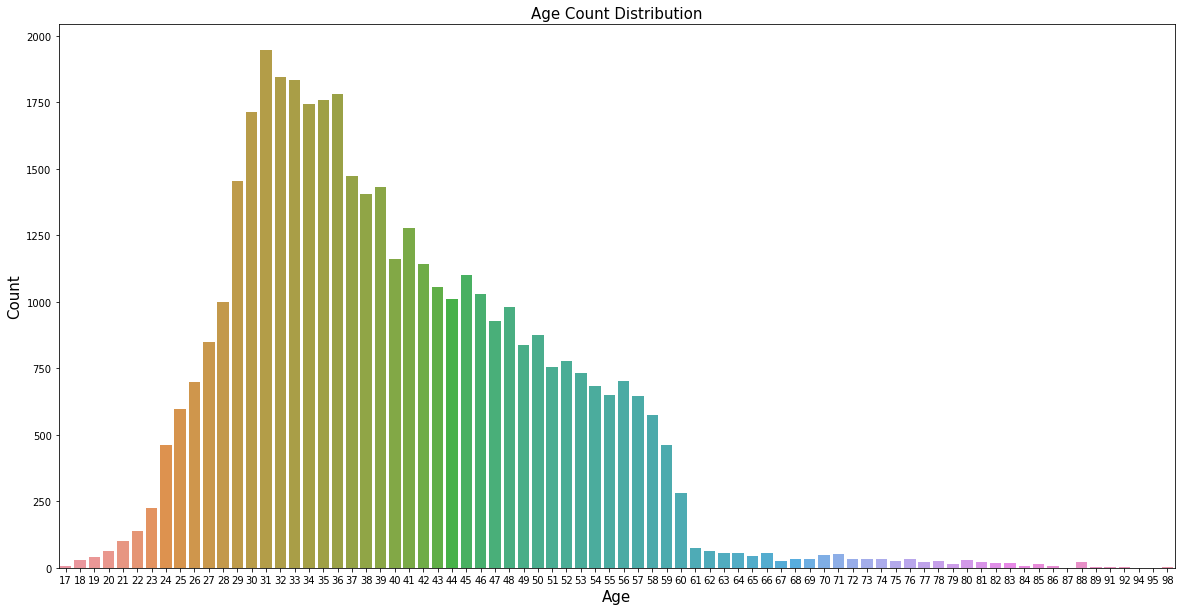

In [54]:
# Age Distribution 

figure(figsize = (20,10))
sns.countplot(x = 'age', data = bank)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)

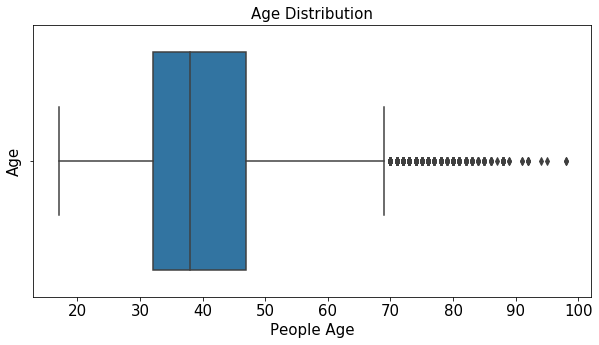

In [52]:
# Age Boxplot

figure(figsize = (10,5))
sns.boxplot(x = 'age', data = bank, orient = 'h')
plt.xlabel('People Age', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=15)
plt.tick_params(labelsize=15)

Rata-rata client bank umurnya kebanyakan dari 30 sampai hampir 50, masih bisa dibilang muda
tapi bisa dilihat juga ada beberapa yg agenya termasuk data outlier